In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens-100k-dataset/ml-100k/u.occupation
/kaggle/input/movielens-100k-dataset/ml-100k/u1.base
/kaggle/input/movielens-100k-dataset/ml-100k/u.info
/kaggle/input/movielens-100k-dataset/ml-100k/u4.test
/kaggle/input/movielens-100k-dataset/ml-100k/u.item
/kaggle/input/movielens-100k-dataset/ml-100k/README
/kaggle/input/movielens-100k-dataset/ml-100k/u1.test
/kaggle/input/movielens-100k-dataset/ml-100k/ua.test
/kaggle/input/movielens-100k-dataset/ml-100k/u.data
/kaggle/input/movielens-100k-dataset/ml-100k/u5.test
/kaggle/input/movielens-100k-dataset/ml-100k/mku.sh
/kaggle/input/movielens-100k-dataset/ml-100k/u5.base
/kaggle/input/movielens-100k-dataset/ml-100k/u.user
/kaggle/input/movielens-100k-dataset/ml-100k/ub.base
/kaggle/input/movielens-100k-dataset/ml-100k/u4.base
/kaggle/input/movielens-100k-dataset/ml-100k/u2.test
/kaggle/input/movielens-100k-dataset/ml-100k/ua.base
/kaggle/input/movielens-100k-dataset/ml-100k/u3.test
/kaggle/input/movielens-100k-dataset/ml-100k/u.

In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [43]:
import tensorflow as tf
import keras
from pprint import pprint

# Preparing Dataset

In [44]:
overall_stats = pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.info', header=None)
print(list(overall_stats[0]))

['943 users', '1682 items', '100000 ratings']


In [45]:
column_names1 = ['user id','movie id','rating','timestamp']
ratings_dataset = pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.data', sep='\t', header=None, names=column_names1)
print(ratings_dataset.shape)
print(ratings_dataset.head())

(100000, 4)
   user id  movie id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596


In [46]:
column_names2 = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [47]:
items_dataset = pd.read_csv('/kaggle/input/movielens-100k-dataset/ml-100k/u.item', sep='|', names=column_names2, header=None,encoding='latin-1')
items_dataset.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
movie_dataset = items_dataset[['movie id','movie title']]
movie_dataset.head()

,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [49]:
#Merging required datasets
merged_dataset = pd.merge(ratings_dataset, movie_dataset, how='inner', on='movie id')
print(merged_dataset.shape)
merged_dataset.head()

(100000, 5)


,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [50]:
#removing duplicate rows
refined_dataset = merged_dataset.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})
print(refined_dataset.shape)
refined_dataset.head()

(99693, 3)


,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


Encoding users and movie titles

In [51]:
user_enc = LabelEncoder()
refined_dataset['user'] = user_enc.fit_transform(refined_dataset['user id'].values)
n_users = refined_dataset['user'].nunique()

In [52]:
item_enc = LabelEncoder()
refined_dataset['movie'] = item_enc.fit_transform(refined_dataset['movie title'].values)
n_movies = refined_dataset['movie'].nunique()

In [53]:
refined_dataset['rating'] = refined_dataset['rating'].values.astype(np.float32)
min_rating = min(refined_dataset['rating'])
max_rating = max(refined_dataset['rating'])
n_users, n_movies, min_rating, max_rating

(943, 1664, 1.0, 5.0)

In [54]:
refined_dataset.head()

,user id,movie title,rating,user,movie
0,1,101 Dalmatians (1996),2.0,0,2
1,1,12 Angry Men (1957),5.0,0,3
2,1,"20,000 Leagues Under the Sea (1954)",3.0,0,6
3,1,2001: A Space Odyssey (1968),4.0,0,7
4,1,"Abyss, The (1989)",3.0,0,16


In [55]:
#Splitting the data into training and testing
X = refined_dataset[['user', 'movie']].values
y = refined_dataset['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=50)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89723, 2), (9970, 2), (89723,), (9970,))

In [56]:
n_factors = 150

X_train_array and X_test_array: are lists of two arrays, where the first array contains user IDs and the second array contains movie IDs

In [57]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [58]:
X_train, X_train_array

(array([[ 180, 1152],
        [ 487,  389],
        [ 177,  302],
        ...,
        [ 431, 1588],
        [ 232,  399],
        [ 138,  612]]),
 [array([180, 487, 177, ..., 431, 232, 138]),
  array([1152,  389,  302, ..., 1588,  399,  612])])

In [59]:
X_train_array[0].shape

(89723,)

In [60]:
#Normalizing the labels
y_train = (y_train - min_rating)/(max_rating - min_rating)
y_test = (y_test - min_rating)/(max_rating - min_rating)

# Softmax Deep Neural Network

In [68]:
# Inputs
user = tf.keras.layers.Input(shape=(1,))
movie = tf.keras.layers.Input(shape=(1,))

# User and Movie Embeddings
u = tf.keras.layers.Embedding(n_users, n_factors, embeddings_initializer='he_normal', 
                              embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(user)
u = tf.keras.layers.Reshape((n_factors,))(u)

m = tf.keras.layers.Embedding(n_movies, n_factors, embeddings_initializer='he_normal', 
                              embeddings_regularizer=tf.keras.regularizers.l2(1e-6))(movie)
m = tf.keras.layers.Reshape((n_factors,))(m)

# User and Movie Biases
ub = tf.keras.layers.Embedding(n_users, 1)(user)
ub = tf.keras.layers.Reshape((1,))(ub)

mb = tf.keras.layers.Embedding(n_movies, 1)(movie)
mb = tf.keras.layers.Reshape((1,))(mb)

# Dot Product of Embeddings
dot_product = tf.keras.layers.Dot(axes=1)([u, m])

# Concatenate everything
x = tf.keras.layers.Concatenate()([u, m, ub, mb, dot_product])
x = tf.keras.layers.Dropout(0.05)(x)

# Dense layers with Batch Normalization
x = tf.keras.layers.Dense(32, kernel_initializer='he_normal', 
                          kernel_regularizer=tf.keras.regularizers.l2(1e-6))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)

x = tf.keras.layers.Dense(16, kernel_initializer='he_normal', 
                          kernel_regularizer=tf.keras.regularizers.l2(1e-6))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.05)(x)

# Output layer
x = tf.keras.layers.Dense(9, activation='softmax')(x)

# Model
model = tf.keras.models.Model(inputs=[user, movie], outputs=x)

# Compile
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

In [69]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 1, 150)       141450      ['input_7[0][0]']                
                                                                                                  
 embedding_11 (Embedding)       (None, 1, 150)       249600      ['input_8[0][0]']                
                                                                                            

In [70]:
# Early Stopping & Model Checkpoint
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True)


In [84]:
history = model.fit(x = X_train_array, y = y_train, batch_size=128, epochs=100, callbacks=[model_checkpoint, early_stopping], verbose=1, validation_data=(X_test_array, y_test) ,shuffle=True)

Epoch 1/100
701/701 [==============================] - 5s 6ms/step - loss: 0.0277 - accuracy: 0.2680 - val_loss: 2.2297 - val_accuracy: 0.1411
Epoch 2/100
701/701 [==============================] - 5s 6ms/step - loss: 0.0278 - accuracy: 0.2681 - val_loss: 2.2277 - val_accuracy: 0.1405
Epoch 3/100
701/701 [==============================] - 5s 7ms/step - loss: 0.0297 - accuracy: 0.2673 - val_loss: 2.1763 - val_accuracy: 0.1427
Epoch 4/100
701/701 [==============================] - 5s 7ms/step - loss: 0.0296 - accuracy: 0.2674 - val_loss: 2.2475 - val_accuracy: 0.1438
Epoch 5/100
701/701 [==============================] - 5s 7ms/step - loss: 0.0288 - accuracy: 0.2679 - val_loss: 2.2440 - val_accuracy: 0.1445
Epoch 6/100
701/701 [==============================] - 4s 6ms/step - loss: 0.0287 - accuracy: 0.2678 - val_loss: 2.2131 - val_accuracy: 0.1446
Epoch 7/100
701/701 [==============================] - 5s 6ms/step - loss: 0.0303 - accuracy: 0.2671 - val_loss: 2.2345 - val_accuracy: 0.1449

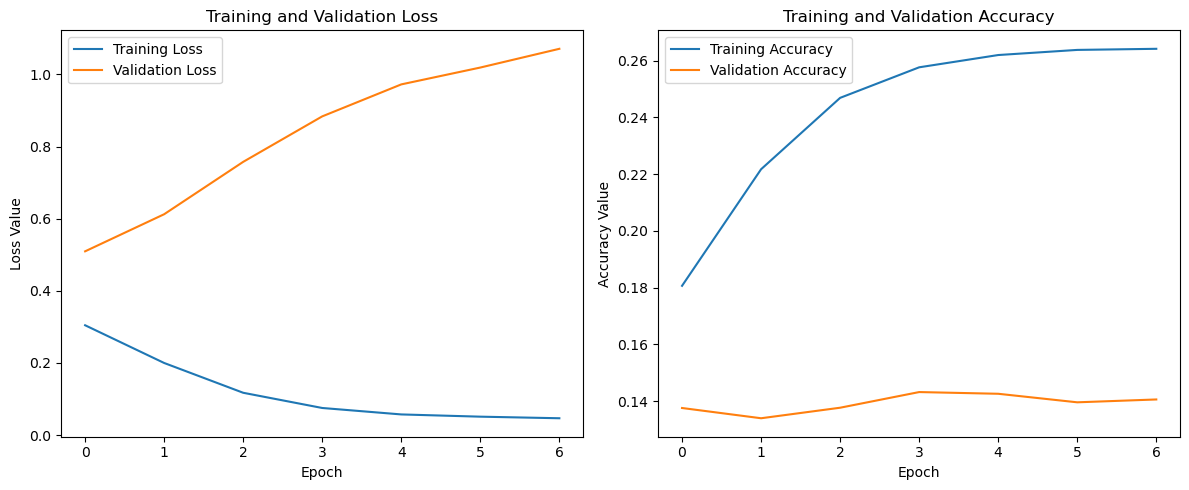

In [72]:
# Plotting loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'][5:], label='Training Loss')
plt.plot(history.history['val_loss'][5:], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'][5:], label='Training Accuracy')
plt.plot(history.history['val_accuracy'][5:], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()

plt.tight_layout()
plt.show()


# Getting movies for given User

The model can predict user ratings for unseen movies. The movies with the highest predicted ratings can be suggested to the user.

In [73]:
user_id = [777]
encoded_user_id = user_enc.transform(user_id)

seen_movies = list(refined_dataset[refined_dataset['user id'] == user_id[0]]['movie'])
print(seen_movies)

[7, 55, 87, 113, 313, 337, 389, 390, 399, 411, 432, 460, 498, 528, 580, 604, 612, 643, 666, 783, 996, 1005, 1032, 1102, 1132, 1157, 1190, 1208, 1251, 1260, 1284, 1302, 1342, 1523, 1558, 1615]


In [74]:
#listing out unseen movies
unseen_movies = [i for i in range(min(refined_dataset['movie']), max(refined_dataset['movie'])+1) if i not in seen_movies]
print(unseen_movies)

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 

In [75]:
model_input = [np.asarray(list(encoded_user_id)*len(unseen_movies)), np.asarray(unseen_movies)]

In [76]:
predicted_ratings = model.predict(model_input)

51/51 [==============================] - 0s 2ms/step


In [77]:
print(predicted_ratings)

[[9.0038431e-01 8.9384496e-02 1.0282411e-03 ... 1.7114903e-03
  9.8582078e-04 2.6773489e-03]
 [7.3455554e-01 2.5576192e-01 9.9811167e-04 ... 1.1546656e-03
  2.5704214e-03 1.6165432e-03]
 [8.3465314e-01 1.5030664e-01 1.6512243e-03 ... 1.7532074e-03
  1.7622091e-03 3.9916956e-03]
 ...
 [6.5401340e-01 3.3338439e-01 2.2499696e-03 ... 5.4679817e-04
  2.0372891e-03 3.1475665e-03]
 [5.7676888e-01 4.0858096e-01 2.6255508e-03 ... 8.3712937e-04
  2.7525299e-03 2.6306186e-03]
 [5.7773310e-01 4.0497941e-01 3.0025470e-03 ... 6.5830763e-04
  3.0967279e-03 3.9561852e-03]]


In [78]:
predicted_ratings = np.max(predicted_ratings, axis=1)
predicted_ratings

array([0.9003843 , 0.73455554, 0.83465314, ..., 0.6540134 , 0.5767689 ,
       0.5777331 ], dtype=float32)

In [79]:
sorted_index = np.argsort(predicted_ratings)[::-1]
print(sorted_index)

[ 959  641  775 ...  748 1189   78]


In [80]:
recommended_movies = item_enc.inverse_transform(sorted_index)
recommended_movies[0:5]

array(['Mediterraneo (1991)', 'Grosse Fatigue (1994)', 'Jaws 3-D (1983)',
       'Bob Roberts (1992)', 'In the Line of Duty 2 (1987)'], dtype=object)

In [81]:
def recommender_system(user_id, model, n_movies):

  encoded_user_id = user_enc.transform([user_id])

  seen_movies = list(refined_dataset[refined_dataset['user id'] == user_id]['movie'])
  unseen_movies = [i for i in range(min(refined_dataset['movie']), max(refined_dataset['movie'])+1) if i not in seen_movies]
  model_input = [np.asarray(list(encoded_user_id)*len(unseen_movies)), np.asarray(unseen_movies)]
  predicted_ratings = model.predict(model_input)
  predicted_ratings = np.max(predicted_ratings, axis=1)
  sorted_index = np.argsort(predicted_ratings)[::-1]
  recommended_movies = item_enc.inverse_transform(sorted_index)
  print("---------------------------------------------------------------------------------")
  print("Top "+str(n_movies)+" Movie recommendations for the User "+str(user_id)+ " are:")
  pprint(list(recommended_movies[:n_movies]))

In [82]:
print("Enter user id")
user_id= int(input())

print("Enter number of movies to be recommended:")
n_movies = int(input())
recommender_system(user_id,model,n_movies)

Enter user id


 45


Enter number of movies to be recommended:


 5


51/51 [==============================] - 0s 2ms/step
---------------------------------------------------------------------------------
Top 5 Movie recommendations for the User 45 are:
['Highlander III: The Sorcerer (1994)',
 'Sabrina (1954)',
 'Sweet Hereafter, The (1997)',
 'Groundhog Day (1993)',
 'Jaws (1975)']
